# Red Wine Quality Classification

#### This notebook implements PyCaret, a low-code machine learning Python library to predict the quality of red wine based on physiochemical properties. A red wine dataset is included with vinho verde wine samples from northern Portugal. The target variable is the wine quality (1-10). The mission of this notebook is to:

#### - Understand the dataset using Exploratory Data Analysis (EDA) techniques.
#### - Perform fundamental feature engineering to improve model performance.
#### - Train and compare various classification models.
#### - Select, tune and evaluate the performance of a model.

## Installations & Imports

#### Please note, PyCaret is supported on Python versions 3.7 - 3.11 currently. PyCaret can be installed using the pip package manager:
pip install pycaret

#### To perform exploratory data analysis, ensure pandas and numpy imported. Have matplotlib and seaborn imported for data visualization.
pip install seaborn

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Loading & EDA

#### The dataset is loaded from the UCI Machine Learning Repository. The dataset shows 12 features, each characterized using numerical values. The target variable as mentioned earlier is the wine quality.

In [ ]:
df = pd.read_csv('winequality-red.csv', sep=';')
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

#### Some basic data extraction is performed using the following pandas attributes:

df.shape

df.info()

df.describe()

In [ ]:
df.shape

(1599, 12)

In [ ]:
df['quality'] = df['quality'].astype('category')
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         1599 non-null   float64 
 1   volatile acidity      1599 non-null   float64 
 2   citric acid           1599 non-null   float64 
 3   residual sugar        1599 non-null   float64 
 4   chlorides             1599 non-null   float64 
 5   free sulfur dioxide   1599 non-null   float64 
 6   total sulfur dioxide  1599 non-null   float64 
 7   density               1599 non-null   float64 
 8   pH                    1599 non-null   float64 
 9   sulphates             1599 non-null   float64 
 10  alcohol               1599 non-null   float64 
 11  quality               1599 non-null   category
dtypes: category(1), float64(11)
memory usage: 139.3 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


#### The dataset is shown to have 1599 samples in total. Each sample has 12 features characterized using numeric values where the target is quality. quality is converted to categorical.

array([[<Axes: xlabel='fixed acidity', ylabel='fixed acidity'>,
        <Axes: xlabel='volatile acidity', ylabel='fixed acidity'>,
        <Axes: xlabel='citric acid', ylabel='fixed acidity'>,
        <Axes: xlabel='residual sugar', ylabel='fixed acidity'>,
        <Axes: xlabel='chlorides', ylabel='fixed acidity'>,
        <Axes: xlabel='free sulfur dioxide', ylabel='fixed acidity'>,
        <Axes: xlabel='total sulfur dioxide', ylabel='fixed acidity'>,
        <Axes: xlabel='density', ylabel='fixed acidity'>,
        <Axes: xlabel='pH', ylabel='fixed acidity'>,
        <Axes: xlabel='sulphates', ylabel='fixed acidity'>,
        <Axes: xlabel='alcohol', ylabel='fixed acidity'>],
       [<Axes: xlabel='fixed acidity', ylabel='volatile acidity'>,
        <Axes: xlabel='volatile acidity', ylabel='volatile acidity'>,
        <Axes: xlabel='citric acid', ylabel='volatile acidity'>,
        <Axes: xlabel='residual sugar', ylabel='volatile acidity'>,
        <Axes: xlabel='chlorides', ylabel

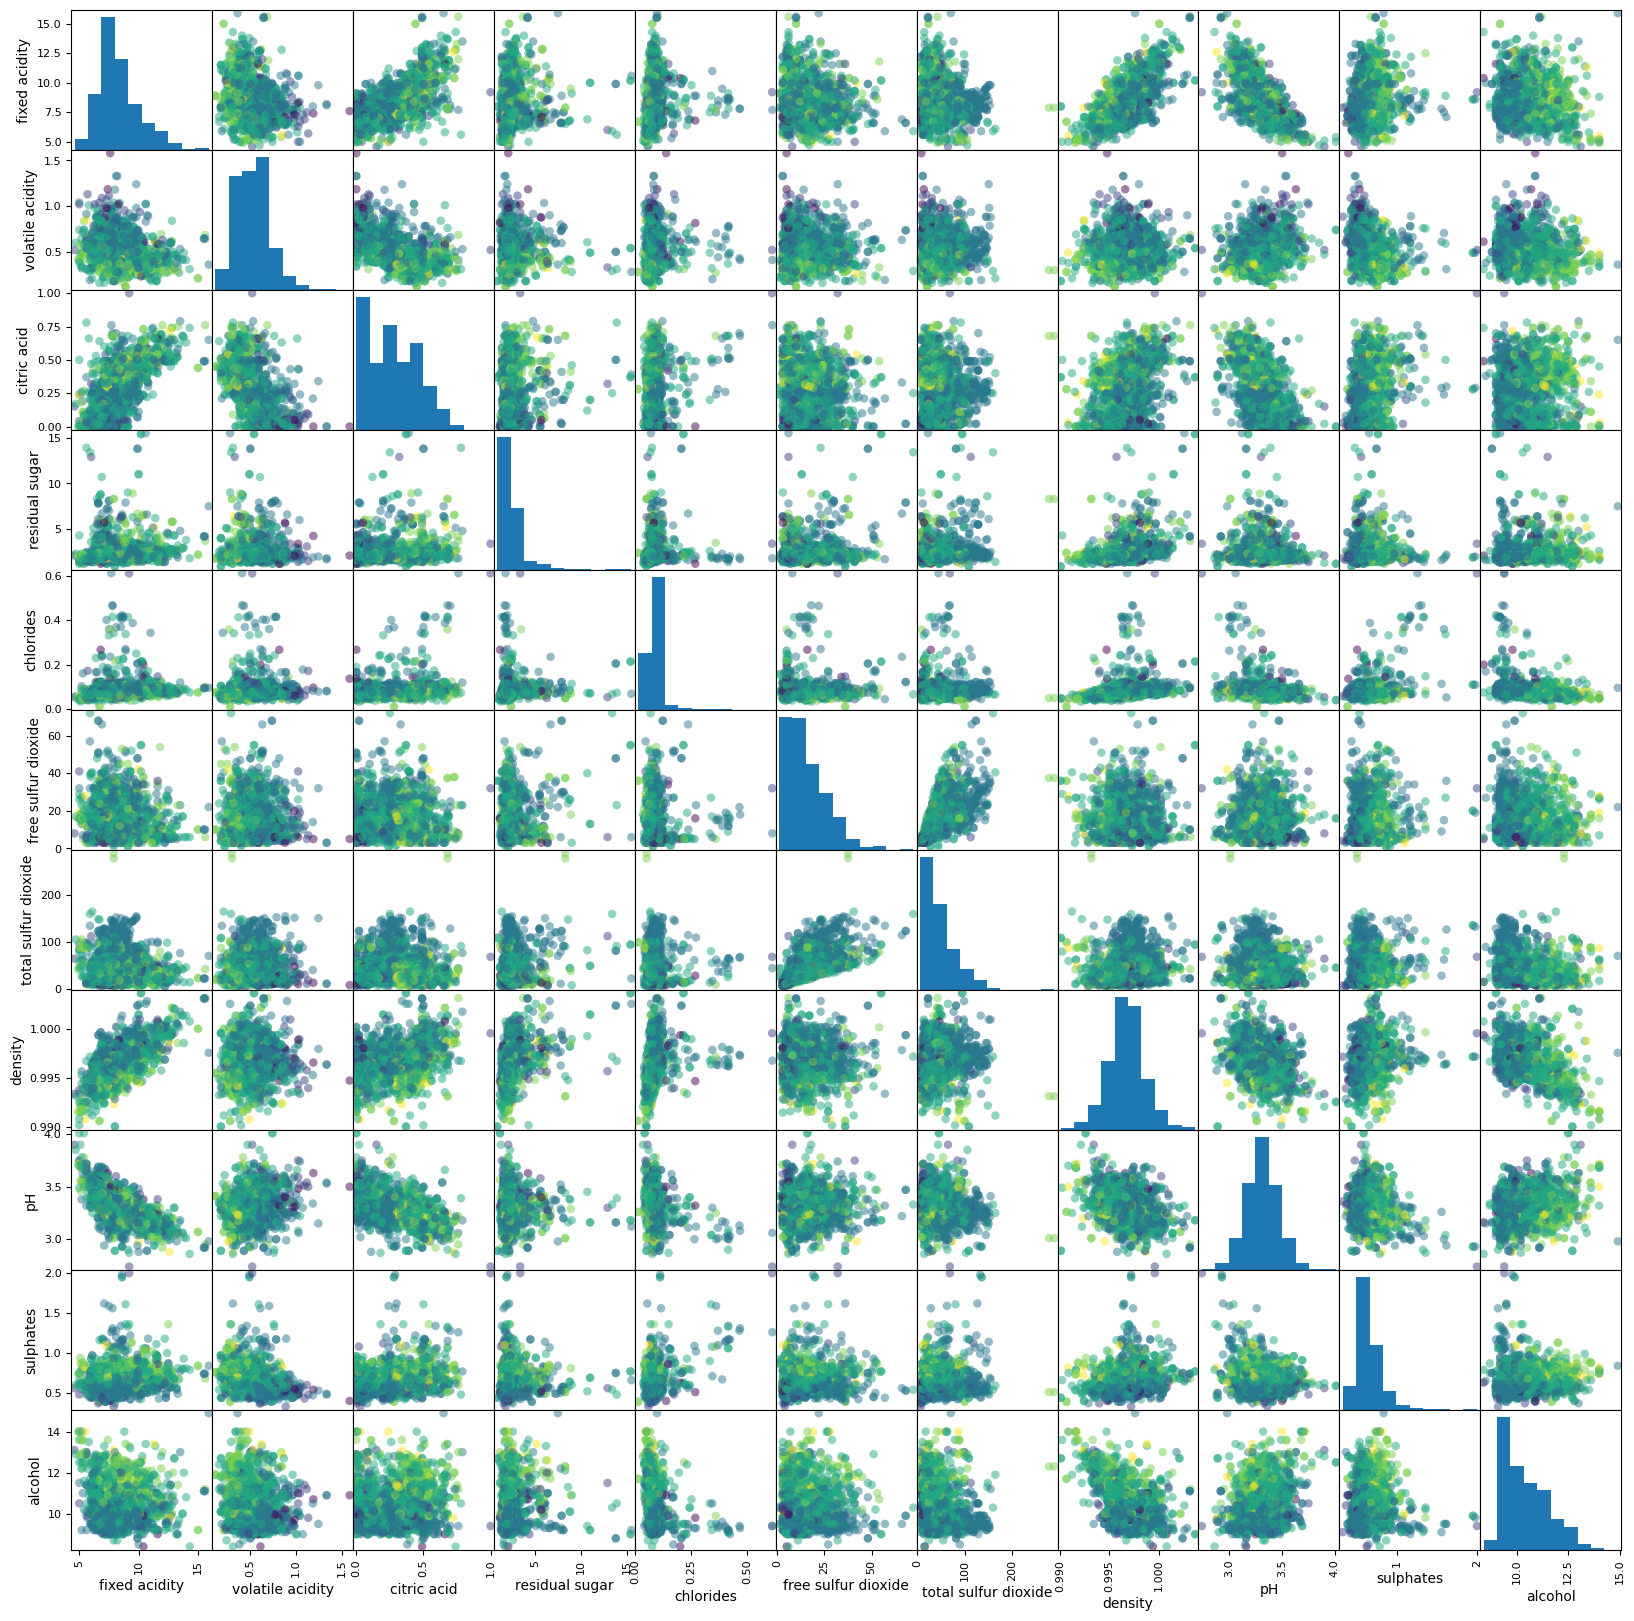

In [ ]:
pd.plotting.scatter_matrix(df, c = df['quality'].cat.codes, figsize = [20, 20], s=150)

#### The EDA visualization plots show that physiochemical properties such as sulphates, total and free sulfur dioxide, chlorides and residual sugars are right-skewed. These properties are shown to be constrained compared to the others that follow relatively normal distributions. Some meaningful correlations between features are as follows:

#### - Citric Acidity and Fixed Acidity have a somewhat positive linear relationship; combining these features may characterize the overall acidity of the wine.
#### - The "strength" of the wine can be correlated through alcohol and density; a negative linear relationship appears between the two.

#### A logarithmic transform can be applied to the right-skewed features to see if performance improves.

#### Boxplots of some key features are plotted as well for further visualization.

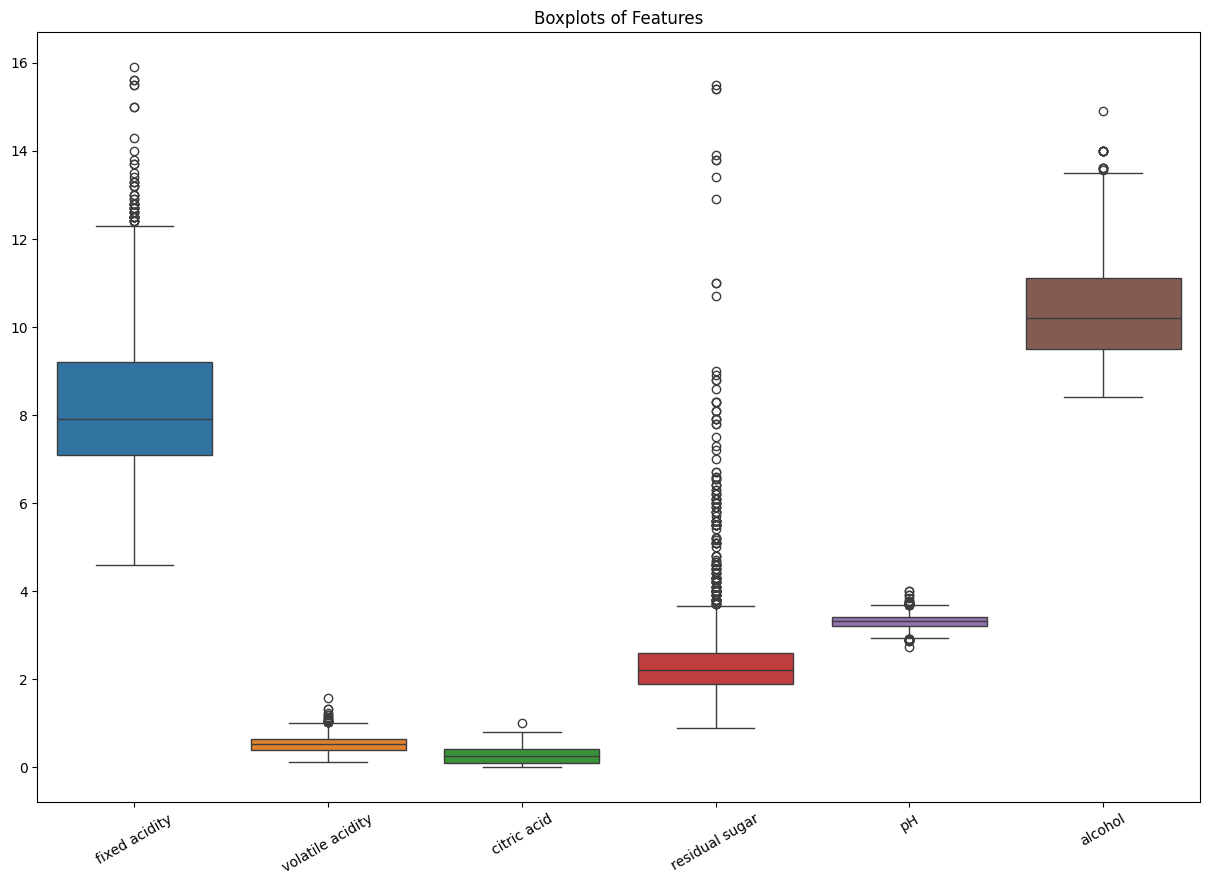

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df[["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "pH", "alcohol"]])
plt.title("Boxplots of Features")
plt.xticks(rotation=30)
plt.show()

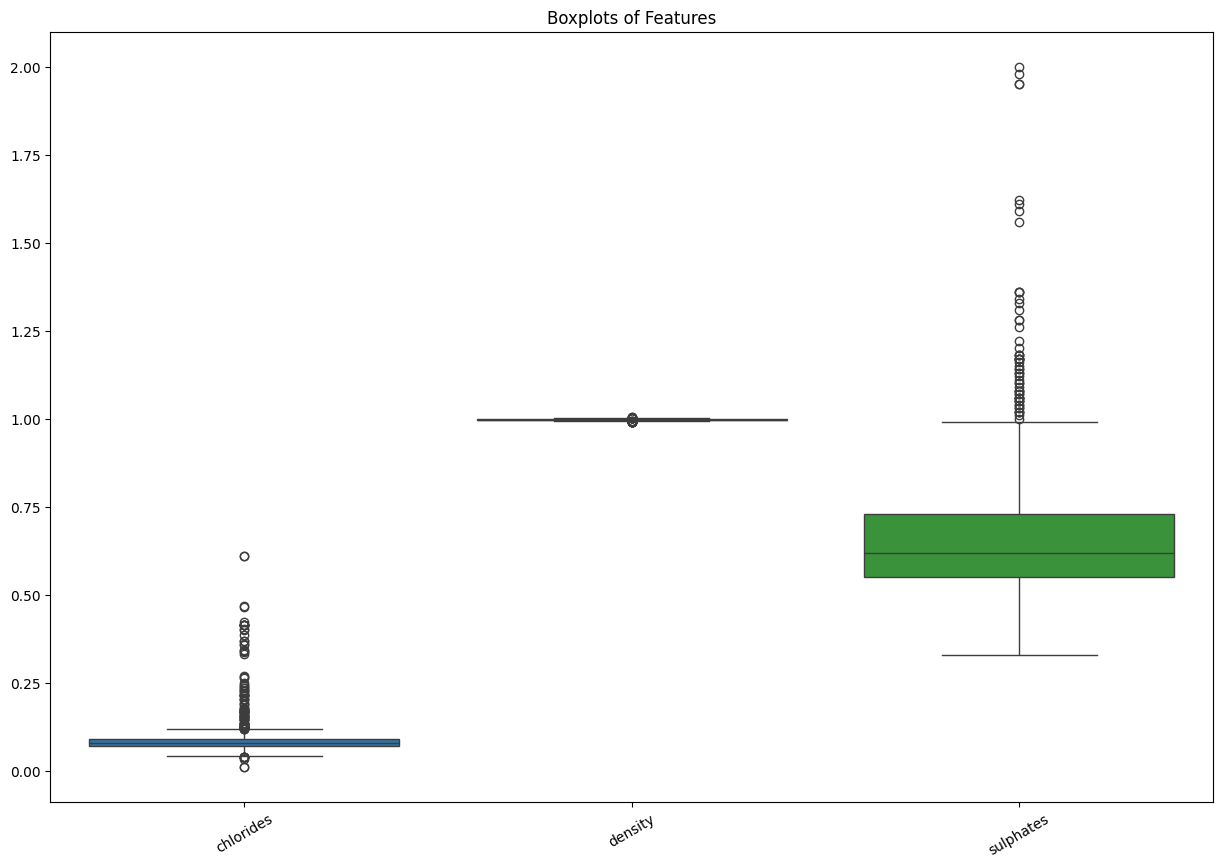

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df[["chlorides", "density", "sulphates"]])
plt.title("Boxplots of Features")
plt.xticks(rotation=30)
plt.show()

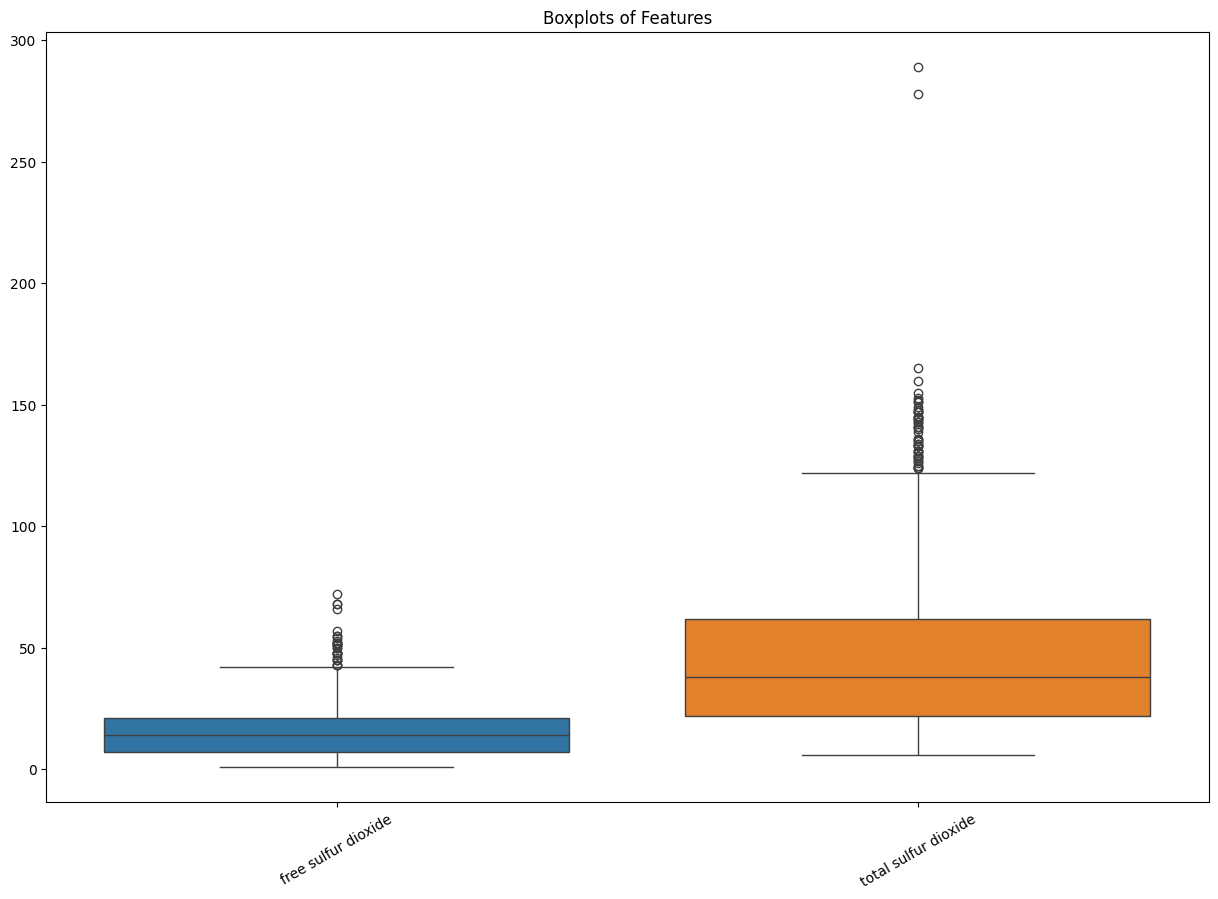

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df[["free sulfur dioxide", "total sulfur dioxide"]])
plt.title("Boxplots of Features")
plt.xticks(rotation=30)
plt.show()

#### The boxplots were split into 3 separate figures for a more indepth data visualization. Features such as density, pH, volatile acidity and citric acid showed constrained distributions showing that they are unlikely to require any transforms. The box plots further emphasize the outliers found in residual sugar, sulphates, chlorides and free/total sulfur dioxide features. It should be noted that certain models like random forests or extra trees are not impacted by right-skewed features and so these models may perform better, especially if blended with each other.

## Feature Engineering

#### Missing values and duplicates are searched for in the dataset. Duplicates are dropped and simple feature engineering is performed; primarily combining correlated variables and performing a log-transform on right-skewed features.

In [ ]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
df.duplicated().sum()

240

#### No values are missing however it appears that there are numerous duplicated samples. It was found that removing these duplicates worsened model accuracy by approximately ~5%. Reducing duplicates worsens generalization, and reduce representation of rarer wine classes as well. Duplicates were therefore kept in the dataset.

In [ ]:
df['fixed_to_volatile_acidity'] = df['fixed acidity'] / (df['volatile acidity'])
df['citric_to_volatile_acidity'] = df['citric acid'] / (df['volatile acidity'])
df['free_to_total_sulfur'] = df['free sulfur dioxide'] / (df['total sulfur dioxide'])
df['alcohol_density_ratio'] = df['alcohol'] / df['density']

df['alcohol_squared'] = df['alcohol'] ** 2
df['volatile_acidity_squared'] = df['volatile acidity'] ** 2
df['sulphates_squared'] = df['sulphates'] ** 2

# Log transform right-skewed features
df['log_residual_sugar'] = np.log1p(df['residual sugar'])
df['log_chlorides'] = np.log1p(df['chlorides'])
df['log_total_sulfur_dioxide'] = np.log1p(df['total sulfur dioxide'])
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,...,fixed_to_volatile_acidity,citric_to_volatile_acidity,free_to_total_sulfur,alcohol_density_ratio,alcohol_squared,volatile_acidity_squared,sulphates_squared,log_residual_sugar,log_chlorides,log_total_sulfur_dioxide
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,...,10.571429,0.000000,0.323529,9.420726,88.36,0.4900,0.3136,1.064711,0.073250,3.555348
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,...,8.863636,0.000000,0.373134,9.831461,96.04,0.7744,0.4624,1.280934,0.093490,4.219508
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,...,10.263158,0.052632,0.277778,9.829488,96.04,0.5776,0.4225,1.193922,0.088011,4.007333
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,...,40.000000,2.000000,0.283333,9.819639,96.04,0.0784,0.3364,1.064711,0.072321,4.110874
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,...,10.571429,0.000000,0.323529,9.420726,88.36,0.4900,0.3136,1.064711,0.073250,3.555348


# Model Development

#### Pycaret is now used to set up the experiment, compare and select the best models, evaluate, tune and save the final model. The pipeline is summarized as such:

#### - Use 'setup()' to create the experiment
#### - Compare different models using 'compare_models()'
#### - select the best model and tune it to improve performance
#### - Save the pipeline

In [ ]:
from pycaret.classification import *
s = setup(df, target = 'quality', session_id = 1)

,Description,Value
0,Session id,1
1,Target,quality
2,Target type,Multiclass
3,Target mapping,"3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5"
4,Original data shape,"(1599, 22)"
5,Transformed data shape,"(1599, 22)"
6,Transformed train set shape,"(1119, 22)"
7,Transformed test set shape,"(480, 22)"
8,Numeric features,21
9,Preprocess,True


#### Accuracy is not the optimal metric for measuring wine quality. Most wine quality values are between 5 and 6; If the model were to predict 5 or 6 it would be often be correct but would not be able to accurately identify less common classes. Metrics like recall and precision are better at identifying uncommon classes, a low recall is indicative that the model is ignoring classes like 7-8. Therefore, the best metrics to compare our model to is F1 followed by Recall.

In [ ]:
best_f1 = compare_models(sort='F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.6774,0.5830,0.6774,0.6492,0.6597,0.4793,0.4823,0.0340
lightgbm,Light Gradient Boosting Machine,0.6720,0.5762,0.6720,0.6440,0.6537,0.4695,0.4728,0.4150
et,Extra Trees Classifier,0.6640,0.5878,0.6640,0.6443,0.6459,0.4532,0.4580,0.0260
gbc,Gradient Boosting Classifier,0.6480,0.0000,0.6480,0.6262,0.6336,0.4364,0.4389,0.2300
dt,Decision Tree Classifier,0.6024,0.4752,0.6024,0.6001,0.5977,0.3779,0.3800,0.0070
lda,Linear Discriminant Analysis,0.5836,0.0000,0.5836,0.5810,0.5773,0.3413,0.3433,0.0050
knn,K Neighbors Classifier,0.5863,0.5223,0.5863,0.5550,0.5647,0.3270,0.3310,0.1890
lr,Logistic Regression,0.5791,0.0000,0.5791,0.5443,0.5525,0.3058,0.3107,0.2960
ridge,Ridge Classifier,0.5782,0.0000,0.5782,0.5278,0.5352,0.2891,0.2972,0.0050
qda,Quadratic Discriminant Analysis,0.5228,0.0000,0.5228,0.5588,0.5264,0.2986,0.3060,0.0060


In [ ]:
best_recall = compare_models(sort='Recall')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.6828,0.5812,0.6828,0.6525,0.6633,0.4853,0.4887,0.1280
et,Extra Trees Classifier,0.6766,0.5887,0.6766,0.6532,0.6594,0.4768,0.4805,0.0930
lightgbm,Light Gradient Boosting Machine,0.6658,0.5759,0.6658,0.6428,0.6489,0.4606,0.4641,1.6680
gbc,Gradient Boosting Classifier,0.6372,0.0000,0.6372,0.6201,0.6259,0.4213,0.4229,0.8570
lr,Logistic Regression,0.5934,0.0000,0.5934,0.5583,0.5682,0.3301,0.3346,0.1110
ridge,Ridge Classifier,0.5880,0.0000,0.5880,0.5427,0.5480,0.3080,0.3157,0.0130
lda,Linear Discriminant Analysis,0.5801,0.0000,0.5801,0.5815,0.5771,0.3408,0.3425,0.0130
dt,Decision Tree Classifier,0.5719,0.4592,0.5719,0.5665,0.5669,0.3278,0.3288,0.0170
knn,K Neighbors Classifier,0.5443,0.4999,0.5443,0.5178,0.5258,0.2626,0.2658,0.0150
qda,Quadratic Discriminant Analysis,0.5130,0.0000,0.5130,0.5365,0.5064,0.2748,0.2838,0.0120


In [ ]:
rf_model = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6607,0.8510,0.6607,0.6304,0.6397,0.4445,0.4488
1,0.7232,0.8424,0.7232,0.6831,0.7022,0.5579,0.5598
2,0.6875,0.8444,0.6875,0.6590,0.6671,0.4927,0.4965
3,0.6696,0.8215,0.6696,0.6307,0.6478,0.4664,0.4695
4,0.6696,0.7976,0.6696,0.6369,0.6455,0.4638,0.4686
5,0.6696,0.7984,0.6696,0.6315,0.6492,0.4669,0.4690
6,0.6964,0.0000,0.6964,0.6714,0.6803,0.5094,0.5140
7,0.6786,0.0000,0.6786,0.6490,0.6611,0.4750,0.4778
8,0.6696,0.0000,0.6696,0.6447,0.6561,0.4662,0.4675


#### After creating the model based on a random forest algorithm, tuning was applied however the model performance worsened by ~4%, showing that the random forest algorithm was already highly tuned and near optimal. Hyperparameter tuning increases risk of overfitting CV folds which is especially true for smaller datasets as this one, which may have been an indicator as to why performance degraded. Tuning of the extra trees model was attempted as well however this also worsened performance of the model by nearly 10%.

In [ ]:
tuned_rf = tune_model(rf_model, optimize = 'F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6875,0.8162,0.6875,0.6740,0.6677,0.4852,0.4915
1,0.6607,0.8164,0.6607,0.6229,0.6385,0.4476,0.4507
2,0.6607,0.8353,0.6607,0.6288,0.6348,0.4404,0.4461
3,0.5982,0.7741,0.5982,0.5642,0.5780,0.3507,0.3540
4,0.5893,0.7486,0.5893,0.5471,0.5560,0.3192,0.3265
5,0.6071,0.7863,0.6071,0.5728,0.5855,0.3584,0.3616
6,0.6875,0.0000,0.6875,0.6684,0.6700,0.4912,0.5001
7,0.5625,0.0000,0.5625,0.5432,0.5389,0.2712,0.2754
8,0.5893,0.0000,0.5893,0.5606,0.5744,0.3380,0.3388


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
best_recall_models_top3 = compare_models(sort = 'Recall', n_select = 3)
final_model = blend_models(best_recall_models_top3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.6828,0.5812,0.6828,0.6525,0.6633,0.4853,0.4887,0.1260
et,Extra Trees Classifier,0.6766,0.5887,0.6766,0.6532,0.6594,0.4768,0.4805,0.0890
lightgbm,Light Gradient Boosting Machine,0.6658,0.5759,0.6658,0.6428,0.6489,0.4606,0.4641,1.6010
gbc,Gradient Boosting Classifier,0.6372,0.0000,0.6372,0.6201,0.6259,0.4213,0.4229,0.8220
lr,Logistic Regression,0.5934,0.0000,0.5934,0.5583,0.5682,0.3301,0.3346,0.1150
ridge,Ridge Classifier,0.5880,0.0000,0.5880,0.5427,0.5480,0.3080,0.3157,0.0130
lda,Linear Discriminant Analysis,0.5801,0.0000,0.5801,0.5815,0.5771,0.3408,0.3425,0.0120
dt,Decision Tree Classifier,0.5719,0.4592,0.5719,0.5665,0.5669,0.3278,0.3288,0.0180
knn,K Neighbors Classifier,0.5443,0.4999,0.5443,0.5178,0.5258,0.2626,0.2658,0.0210
qda,Quadratic Discriminant Analysis,0.5130,0.0000,0.5130,0.5365,0.5064,0.2748,0.2838,0.0140


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6964,0.8588,0.6964,0.6596,0.6752,0.5071,0.5105
1,0.6429,0.8389,0.6429,0.6090,0.6237,0.4210,0.4234
2,0.7054,0.8562,0.7054,0.6725,0.6822,0.5197,0.5249
3,0.6786,0.8474,0.6786,0.6455,0.6590,0.4836,0.4874
4,0.6339,0.8078,0.6339,0.6112,0.6136,0.4063,0.4151
5,0.6607,0.8103,0.6607,0.6228,0.6408,0.4546,0.4564
6,0.6786,0.0000,0.6786,0.6534,0.6630,0.4844,0.4884
7,0.7232,0.0000,0.7232,0.6928,0.7033,0.5490,0.5553
8,0.6696,0.0000,0.6696,0.6523,0.6607,0.4761,0.4764


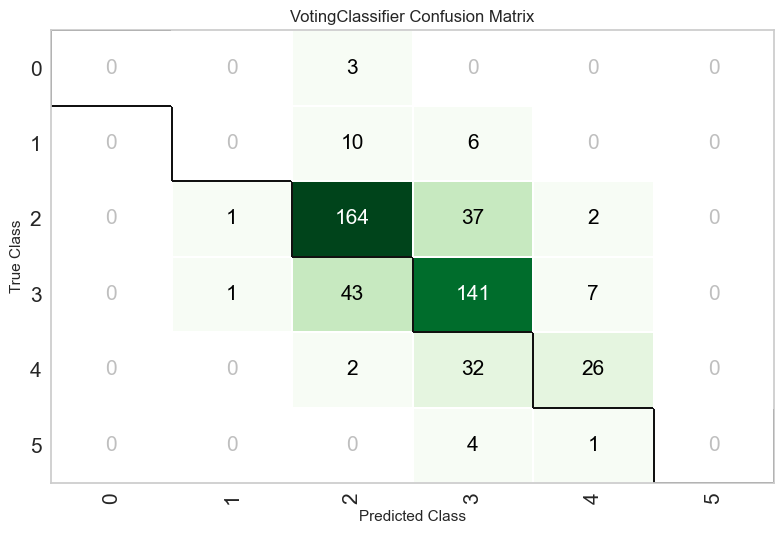

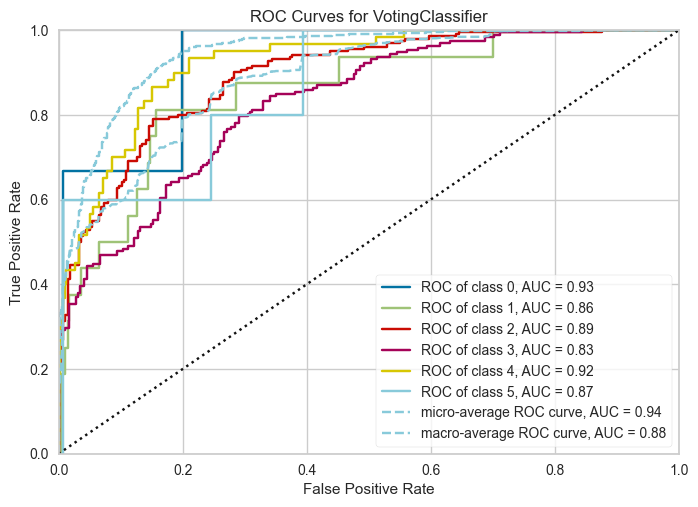

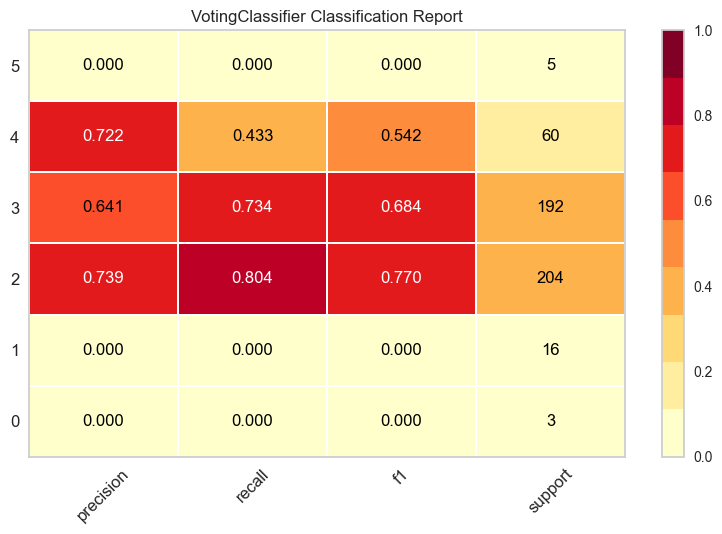

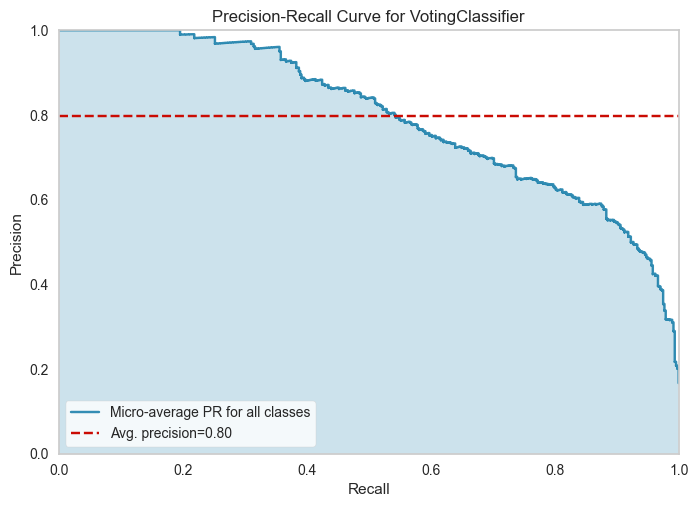

In [ ]:
plot_model(final_model, plot = 'confusion_matrix')
plot_model(final_model, plot = 'auc')
plot_model(final_model, plot='class_report')
plot_model(final_model, plot='pr')
plot_model(final_model, plot='learning')

In [ ]:
holdout_pred = predict_model(final_model)
holdout_pred.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.6938,0.8674,0.6938,0.6576,0.6722,0.5006,0.5039


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,prediction_label,prediction_score
812,10.8,0.450,0.33,2.5,0.099,20.0,38.0,0.99818,3.24,0.71,10.8,5,5,0.8628
335,11.9,0.695,0.53,3.4,0.128,7.0,21.0,0.99920,3.17,0.84,12.2,7,6,0.7031
421,6.6,0.840,0.03,2.3,0.059,32.0,48.0,0.99520,3.52,0.56,12.3,7,7,0.8657
614,9.2,0.755,0.18,2.2,0.148,10.0,103.0,0.99690,2.87,1.36,10.2,6,5,0.7393
166,6.8,0.640,0.10,2.1,0.085,18.0,101.0,0.99560,3.34,0.52,10.2,5,5,0.8082


In [ ]:
true_model = finalize_model(final_model)
save_model(true_model, "red_wine_quality_pipeline")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['fixed acidity',
                                              'volatile acidity', 'citric acid',
                                              'residual sugar', 'chlorides',
                                              'free sulfur dioxide',
                                              'total sulfur dioxide', 'density',
                                              'pH', 'sulphates...
                                                               importance_type='split',
                                                               learning_rate=0.1,
                                                               max_depth=

In [ ]:
loaded_pipeline = load_model("red_wine_quality_pipeline")
loaded_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\kosta\AppData\Local\Temp\joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['fixed acidity',
                                             'volatile acidity', 'citric acid',
                                             'residual sugar', 'chlorides',
                                             'free sulfur dioxide',
                                             'total...
                                                              importance_type='split',
                                                              learning_rate=0.1,
                                                              max_depth=-1,
                                                              min_child_samples=20,
                                                              min_child_weight=0.001,
                                                              min_split_gain=0.0,
                                                              n_estimators=100,
                                                              n_jobs=-1,
                                                              num_leaves=31,
                                                              objective=None,
                                                              random_state=1,
                                                              reg_alpha=0.0,
                                                              reg_lambda=0.0,
                                                              subsample=1.0,
                                                              subsample_for_bin=200000,
                                                              subsample_freq=0))],
                                  flatten_transform=True, n_jobs=-1,
                                  verbose=False, voting='soft',
                                  weights=None))],
         verbose=False)